In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from google.colab import drive

# 1. Mount your Google Drive
drive.mount('/content/drive')

# 2. Set the root to MyDrive
drive_root = '/content/drive/MyDrive'

# 3. Add MyDrive to sys.path so Python can find the 'src' folder sitting there
if drive_root not in sys.path:
    sys.path.append(drive_root)

# Now Python will successfully find src/analysis/visualisation.py
from src.analysis.visualisation import StylometricVisualizer

# 4. Point directly to the aesthetics_project folder for your data
data_path = f"{drive_root}/aesthetics_project/merged_features.csv"
df = pd.read_csv(data_path)

print(f"Loaded {df.shape[0]} documents with {df.shape[1]} columns.")

Mounted at /content/drive
Loaded 320 documents with 201 columns.


In [2]:
# Dynamically identify your stylometric feature columns.
# We want to keep all the numerical columns (POS_VERB, L_REF, etc.)
# but exclude the text and metadata columns.
exclude_cols = ['doc_id', 'model', 'genre', 'prompt', 'text']
feature_columns = [col for col in df.columns if col not in exclude_cols]

print(f"Extracted {len(feature_columns)} stylometric features for analysis.")
display(df[['doc_id', 'model', 'genre']].head())

Extracted 196 stylometric features for analysis.


,doc_id,model,genre
0,GPT_narration_000,GPT,narration
1,GPT_narration_001,GPT,narration
2,GPT_narration_002,GPT,narration
3,GPT_narration_003,GPT,narration
4,GPT_narration_004,GPT,narration


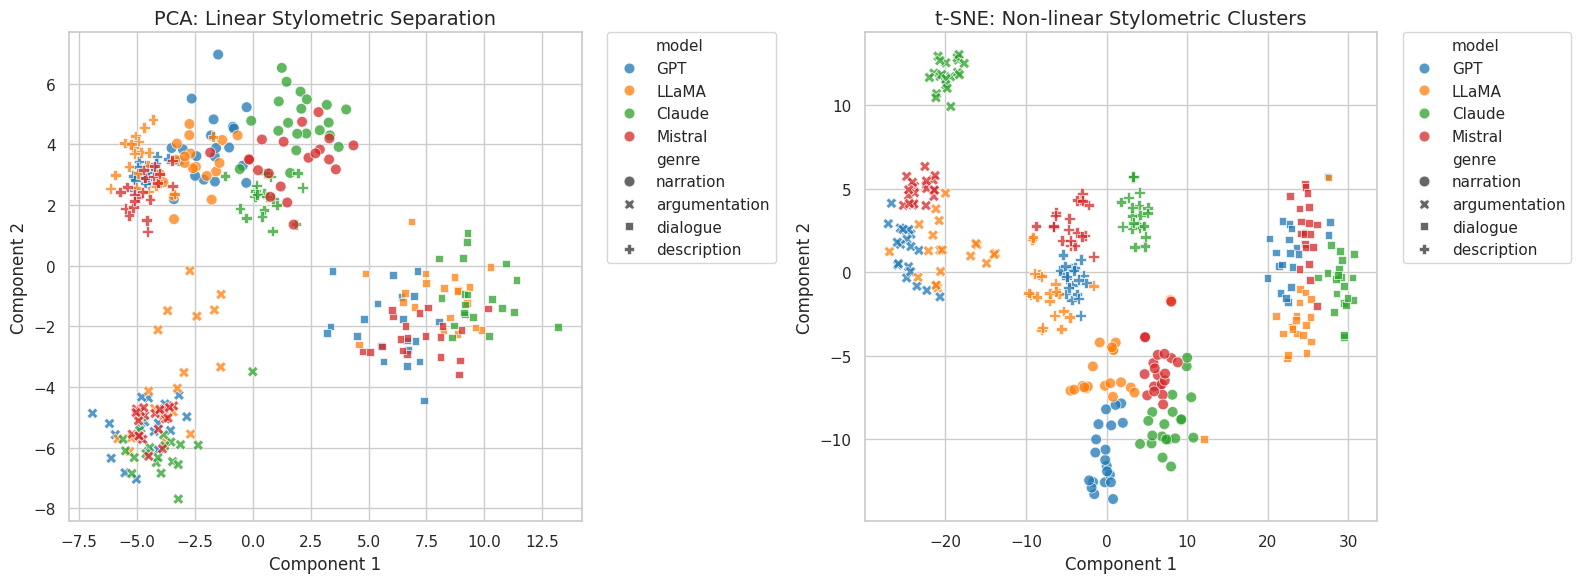

In [3]:
# Set up a clean seaborn theme
sns.set_theme(style="whitegrid")

# Instantiate our OOP visualizer
visualizer = StylometricVisualizer(data=df, feature_cols=feature_columns)

# Generate the plot
# Group colors by 'model' (GPT, Claude, etc.) and marker shapes by 'genre' (narration, description, etc.)
fig = visualizer.plot_pca_tsne(
    hue_col='model',
    style_col='genre',
    perplexity=30  # Adjust this between 5 and 50 if the t-SNE clusters look messy
)

# Display the figure inline
plt.show()